### 0 - MODULES AND CONSTANTS
All the modules, constants, import and libraries used in this file

In [ ]:
import pandas as pd
from seaborn import heatmap

## Imports from sklearn
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


DATA_INPUT_FILE = 'wine.data'
CLASSES = ['class']
FEATURE_NAMES = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']
TEST_DATA_PERCENTAGE=0.2

### 1 - DATASET LOADING

Load the dataset from sklearn, as described in Subsec. Then, based on your X and y, answer
the following questions:
- How many records are available?
- Are there missing values?
- How many elements does each class contain?

In [117]:
def loadDataBase(file:str, cols:list[str])->pd.DataFrame:
    return pd.read_csv(filepath_or_buffer=file, delimiter=',', header=None, names=cols)

def AnsQuestionPart1(df:pd.DataFrame)->None:
    print('How many records are available ? \t', df.shape[0])
    print('Are there missing values ? \n', df[df.isna()].count())
    print('How many elements does each class contain? \t', df.loc[:, 'class'].value_counts().sort_index())

### 2 - CLASSIFIER BUILDING AND TRAINING

Create a DecisionTreeClassifier object with the default configuration (i.e. without passing any
parameters to the constructor). <br>Train the classifier using your X and y.

In [118]:
def createAndTrainTree(df:pd.DataFrame, features:list[str], classes:list[str])->DecisionTreeClassifier:
    tree = DecisionTreeClassifier()
    tree.fit(X=df.loc[:, features], y=df.loc[:, classes])
    
    return tree

### 3 - TREE PLOTTING


Now that you have created a tree, you can visualize it. Sklearn offers two functions to visualize decision trees. 
<ul>
<li>The first one, plot_tree(), plots the tree in a matplotlib-based, interactive window.</li>
<li>An alternative way is using export_graphviz(). This function exports the tree as a DOT file. DOT
is a language for describing graph (and, as a consequence, trees). From the DOT code, you can
generate the resulting visual representation either using specific Python libraries, or by using any
online tools (such as Webgraphviz). </li>
</ul>
We recommend using the latter approach, where you paste the string returned by export_graphviz (which is the DOT file) directly into Webgraphviz.<br> If, instead, you would rather run it locally, you can install pydot (Python package) and graphviz (a graph
visualization software). <br>
After you successfully plotted a tree, you can take a closer look at the result and draw some conclusions. 
<br> In particular, what information is contained in each node? Take a closer look at the leaf
nodes. <br>Based on what you know about over fitting, what can you learn from these nodes?



In [129]:
# Note: this import are only used here, so they will be exceptionally defined here
from pydot import graph_from_dot_data
from IPython.display import Image

def printTree(tree:DecisionTreeClassifier, features:list[str], printGood:bool)->None:
    if printGood:
        dot_code = export_graphviz(tree, feature_names=features)
        Image(graph_from_dot_data(dot_code)[0].create_png())
    else:
        plot_tree(tree)


### 4 - PREDICTION FOR OVER FITTING 

Given the dataset X, you can get the predictions of the classifier (one for each entry in X) by calling
the predict() of DecisionTreeClassifier. <br>
Then, use the accuracy_score() function (which you can import from sklearn.metrics) to compute the accuracy between two lists of values (y_true,
the list of “correct” labels, and y_pred, the list of predictions made by the classifier). 
<br> Since you already have both these lists (y for the ground truth, and the result of the predict() method for the
prediction), you can already compute the accuracy of your classifier. 
<br> What result do you get? 
<br> Does this result seem particularly high/low? 
<br> Why do you think that is?

In [120]:
def testOverFittingValues(tree:DecisionTreeClassifier, df:pd.DataFrame, classes:list[str], features:list[str], method: object) -> float:
    return method(df.loc[:, classes], tree.predict(df.loc[:, features])) *100

### 5 - PARTITIONED DATA SET TESTING AND ACCURACY


Now, we can split our dataset into a training set and a test set. <br>
We will use the training set to train a model, and to assess its performance with the test set. <br>
Sklearn offers the train_test_split() function to split any number of arrays (all having the same length on the first dimension) into two
sets. <br> You can use an 80/20 train/test split. If used correctly, you will get 4 arrays: X_train, X_test, y_train, y_test.

In [121]:
def partitionAndTest(tree:DecisionTreeClassifier, df:pd.DataFrame, classes:list[str], features:list[str], testPercentage:float)->float:
    xTrain, xTest, yTrain, yTest = train_test_split(df.loc[:, features], df.loc[:, classes], test_size=testPercentage)
    tree.fit(xTrain, yTrain)
    yPred = tree.predict(xTest)
    
    heatmap(confusion_matrix(yTest, yPred), annot=True)
    
    return round(accuracy_score(yTest, yPred),3)*100

### 6 -  ADVANCED METRICS

Now, train a new model using (X_train, y_train). Then, compute the accuracy with (X_test,y_test). 
<br> How does this value compare to the previously computed one? Is this a more reasonable value? Why? <br>

This should give you a good idea as to why training and testing on the same dataset returns meaningless results. 

You can also compute other metrics (e.g. precision, recall, F1 score) using the respective functions (precision_score, recall_score, f1_score). <br> Note that, since these three metrics are all based on a single class, you can either compute the value for a single class, aggregate
the results into a single value, or receive the results for all three classes. 
<br>You can also use the classification_report function, which returns various metrics (including the previously mentioned ones) for each of the
classes of the problem.

In [122]:
def partitionAndTestWithAdvancedMetrics(tree:DecisionTreeClassifier, df:pd.DataFrame, classes:list[str], 
                                        features:list[str], testPercentage:float)->dict[str:float]:
        
        xTrain, XTest, yTrain, yTest = train_test_split(df.loc[:, features], df.loc[:, classes], test_size=testPercentage)
        tree.fit(xTrain, yTrain)
        yPred = tree.predict(XTest)
        
        heatmap(confusion_matrix(yTest, yPred), annot=True)
        
        return {'accuracy_score':accuracy_score(yTest, yPred), 'balanced_accuracy_score':balanced_accuracy_score(yTest, yPred),
                'balanced_accuracy_score_adjusted':balanced_accuracy_score(yTest, yPred, adjusted=True), 
                'f1_score':f1_score(yTest, yPred, labels=[1,2,3], average=None), 'recall_score':recall_score(yTest, yPred, average=None), 
                'precision_score':precision_score(yTest, yPred, average=None)}

### 7 - ADVANCED TREE SETTINGS


So far, you have only used “default” decision trees, but, the “default” decision tree might not be the best option in terms of performance to fit our dataset. <br>
In this exercise, you will perform a “grid search”: you will define a set of possible configurations and, for each configuration, build a classifier. Then, you will test the performance of each classifier and identify that configuration that produces the best model.<br>
On the official documentation for DecisionTreeClassifier you can find a list of all parameters you
can modify. Identify some of the parameters that, based on your theoretical knowledge of decision
trees, might affect the performance of the tree. <br>
For each of these parameters, define a set of possible
values (the official documentation provides additional information about the possible values that can
be used). For example, we can identify these two parameters:
<ul>
<li><b>max_depth</b>: which defines the maximum depth of the decision tree, can be set to None (i.e.
unbounded depth), or to values such as 2, 4, 8 (we already know from previous exercises the
approximate depth the tree can reach with this dataset) </li>
<li><b>splitter</b>: which can be set to either best (in which case, for each split, the algorithm will try
all possible splits), or random (in this case, the algorithm will try N random splits on various
features and select the best one)
</li>
</ul>

You can and should identify additional parameters and possible values for them. Then, you can
build a parameter dictionary (i.e. a dictionary where keys are parameter names and values are lists
of candidate values). Using the ParameterGrid class offered by scikit-learn, you can generate a list
of all possible configurations that can be obtained from the parameter dictionary.<br>
For each configuration config, we can train a separate model with our training data, and validate
it with our test data: for each configuration, compute the resulting accuracy on the test data. Then,
select the parameter configuration having highest accuracy.


In [ ]:
def advancedTreeBuilding(df: pd.DataFrame):
    pass

### MAIN FUNCTION


this is the main function of our program that will coordinate code execution, it does:
<ol>
<li>Loads the database into a data structure</li>
<li>Creates and trains the classifier</li>
<li>Prints the tree</li>
<li>Accuracy evaluation for over fitting</li>
<li>Model testing with partitioned data set</li>
<li>Advanced metrics</li>
<li>Advanced and custom tree classifier usage</li>
<li></li>
<li></li>
</ol>

,accuracy_score,balanced_accuracy_score,balanced_accuracy_score_adjusted,f1_score,recall_score,precision_score
0,0.805556,0.805047,0.70757,0.888889,0.923077,0.857143
1,0.805556,0.805047,0.70757,0.740741,0.714286,0.769231
2,0.805556,0.805047,0.70757,0.777778,0.777778,0.777778


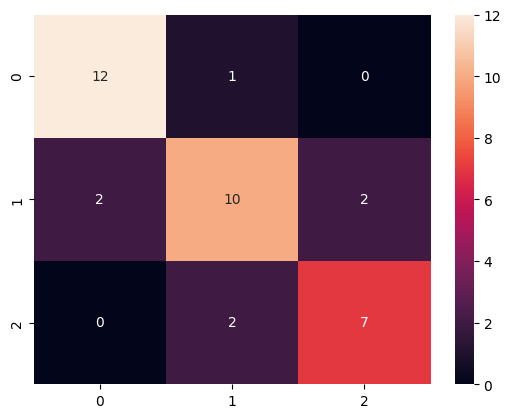

In [ ]:
def main()->None:
    df = loadDataBase(DATA_INPUT_FILE, CLASSES+FEATURE_NAMES) # 1
    # AnsQuestionPart1(df) # 1
    
    tree = createAndTrainTree(df, FEATURE_NAMES, classes=['class']) # 2
    
    # printTree(tree, FEATURE_NAMES, False) # 3
    
    # print("'DUMB' Accuracy of the model ", testOverFittingValues(tree, df, CLASSES, FEATURE_NAMES, accuracy_score)) # 4
    
    # print("final accuracy = ", partitionAndTest(DecisionTreeClassifier(), df, CLASSES, FEATURE_NAMES, TEST_DATA_PERCENTAGE)) # 5
    
    # display(pd.DataFrame(partitionAndTestWithAdvancedMetrics(DecisionTreeClassifier(), df, CLASSES, FEATURE_NAMES, TEST_DATA_PERCENTAGE))) # 6
    
    advancedTreeBuilding(df)
    
    
    
main()